# Billionaires data analysis
## Research Question
* What's the typical wealth of billionaires in fields?
  - The goal of this question is to pinpoint which industries possess the wealth accumulation.
* What differences are there in the number of billionaires in each country?
  - This inquiry aims to examine the differences in the distribution of billionaires across regions and assess their corresponding wealth levels.
* Do billionaires’ ages have any connection to their worth levels?
  - Studying this connection could uncover trends in how wealth grows over time.
* Which Industries Have the Highest Proportion of Young Billionaires?
  - To investigate which industries attract younger billionaires.
* How has the number of billionaires changed over the past decade in relation to global economic events?
  - This analysis will help contextualize wealth accumulation trends within broader economic shifts.
* How Do Economic Indicators (CPI Change, Tax Revenue) Correlate with Wealth Levels of Billionaires?
  - This inquiry aims to assess how changes in consumer price index (CPI) and tax revenue correlate with the wealth levels of billionaires, offering insights into how macroeconomic factors influence individual wealth.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import panel as pn
pn.extension()

import holoviews as hv
import hvplot.pandas  # To use hvplot with pandas
from bokeh.models import HoverTool

In [2]:

df = pd.read_excel('Data_cleaned.xlsx')
idf = df.interactive()

In [3]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country
0,239,8500,Finance & Investments,"Chase Coleman, III.",47,United States,New York,Investments,Finance & Investments,United States,...,21.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523
1,239,8500,Fashion & Retail,Ann Walton Kroenke,74,United States,Electra,Walmart,Fashion & Retail,United States,...,18.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523
2,239,8500,Manufacturing,Li Zhenguo & family,55,China,Xi'an,Solar wafers and modules,Manufacturing,China,...,1.0,125.08,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1397715000
3,242,8400,Media & Entertainment,Jim Kennedy,75,United States,Atlanta,"Media, automotive",Media & Entertainment,United States,...,29.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523
4,242,8400,Metals & Mining,Nicky Oppenheimer & family,77,South Africa,Johannesburg,Diamonds,Metals & Mining,South Africa,...,8.0,158.93,4.1,"$351,431,649,241",22.4,100.9,63.9,27.5,29.2,58558270


In [4]:
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'selfMade',
       'status', 'gender', 'birthDate', 'lastName', 'firstName', 'date',
       'state', 'residenceStateRegion', 'birthYear', 'birthMonth', 'birthDay',
       'cpi_country', 'cpi_change_country', 'gdp_country',
       'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country'],
      dtype='object')

In [5]:
df['finalWorth'] = df['finalWorth'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['age'] = 2023 - df['birthYear']  # Calculate age from birth year
df['is_young'] = df['age'] < 40

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_32476\92815245.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['finalWorth'] = df['finalWorth'].replace({'\$': '', ',': ''}, regex=True).astype(float)


## Analyses

## 1. Typical wealth of Billionaires in Fields
***Goal***: *To identify which industries possess the most wealth accumulation*

In [6]:
basic_stats = df['finalWorth'].describe()
print(basic_stats)

count    2229.000000
mean     2757.021086
std      1756.521910
min      1000.000000
25%      1400.000000
50%      2100.000000
75%      3500.000000
max      8500.000000
Name: finalWorth, dtype: float64


In [7]:
from bokeh.palettes import Plasma256

category_select = pn.widgets.Select(name='Select Category', options=df['category'].unique().tolist(), value='Technology')
show_all_industries = pn.widgets.Checkbox(name='Show All Industries', value=False)

@pn.depends(category_select.param.value, show_all_industries.param.value)
def update_histogram(selected_category, show_all):
    if show_all:
        hist_plot = df.hvplot.hist('finalWorth', bins=30,
        cmap='plasma', title='Distribution of Billionaire Wealth (All Industries)', alpha=0.5, height=400, width=500).opts(ylabel='Number of Billionaires')
    else:
        filtered_df = df[df['category'] == selected_category]
        hist_plot = filtered_df.hvplot.hist('finalWorth', bins=30, cmap='plasma', title=f'Distribution of Billionaire Wealth ({selected_category})', alpha=0.5, height=400, width=500).opts(ylabel='Number of Billionaires')
    return hist_plot

wealth_distribution_section = pn.Column(
    "### Wealth Distribution",
    category_select,
    show_all_industries,
    update_histogram

)

In [8]:
category_select = pn.widgets.Select(name='Select Category', options=df['category'].unique().tolist(), value='Technology')
@pn.depends(category_select.param.value)
def update_avg_wealth(selected_category):
    avg_wealth_by_category = df.groupby('category')['finalWorth'].mean().reset_index()
    bar_plot_avg_wealth = avg_wealth_by_category.hvplot.bar(x='category', y='finalWorth', title='Average Wealth by Category', rot=90, height=500, width=500)
    return bar_plot_avg_wealth

average_wealth = pn.Column(
    update_avg_wealth
)



## 2. Differences in the Number of Billionaires in each Country
***Goal***: *To examine the distribution of billionaires across countries and their wealth levels*

In [9]:
category_select = pn.widgets.Select(name='Select Category', options=df['category'].unique().tolist(), value='Technology')
show_all_industries = pn.widgets.Checkbox(name='Show All Industries', value=False)

@pn.depends(category_select.param.value, show_all_industries.param.value)
def update_country_plot(selected_category, show_all):
    if show_all:
        billionaires_count_by_country = df['country'].value_counts()
    else:
        filtered_df = df[df['category'] == selected_category]
        billionaires_count_by_country = filtered_df['country'].value_counts()

    country_counts = billionaires_count_by_country.reset_index()
    country_counts.columns = ['country', 'count']

    barplot = country_counts.hvplot.barh(
        y='count', x='country',
        title=f'Number of Billionaires by Country ({selected_category if not show_all else "All Industries"})',
        xlabel='Country', ylabel='Count of Billionaires',
        color='count',
        cmap='viridis', height=650, width=1000, logy=True,  # Log scale on x-axis
        hover_cols=['country', 'count']
    ).opts(
        toolbar='above',
        xrotation=45,
        fontsize={'xticks': 7, 'yticks': 7}
    )
    return barplot

country_section = pn.Column(
    "### Number of Billionaires by Country",
    category_select,
    show_all_industries,
    update_country_plot
)

## 3. Connection between Billionaires' Ages and Worth Levels
***Goal***: *To explore trends in wealth growth over time*

In [10]:
age_slider = pn.widgets.RangeSlider(name='Age Range', start=0, end=100, value=(0, 40))

@pn.depends(age_slider.param.value)
def update_age_wealth_scatter(age_range):
    filtered_df = df[(df['age'] >= age_range[0]) & (df['age'] <= age_range[1])]
    scatter_age_wealth = filtered_df.hvplot.scatter(
        x='age', y='finalWorth', title='Age vs. Wealth', legend='top_right',
        height=450, width=500, color='blue', size=10
    )
    return scatter_age_wealth

age_wealth_section = pn.Column(
    "### Age vs. Wealth",
    age_slider,
    update_age_wealth_scatter
)

## 4. Proportion of Young Billionaires
***Goal***: *To investigate which industries attract younger billionaires (under 40), to determine if certain sectors foster earlier wealth accumulation.*

In [11]:
young_age_cutoff = 40
df['age_group'] = df['age'].apply(lambda x: 'Young (<40)' if x < young_age_cutoff else 'Older (>=40)')

age_slider = pn.widgets.RangeSlider(name='Age Range', start=0, end=100, value=(0, 40))

@pn.depends(age_slider.param.value)
def update_young_billionaires(age_range):
    filtered_df = df[(df['age'] >= age_range[0]) & (df['age'] <= age_range[1])]

    age_distribution = filtered_df.groupby(['industries', 'age_group']).size().unstack(fill_value=0)
    age_distribution = age_distribution.reset_index().melt(id_vars='industries', value_name='count', var_name='age_group')

    bar_plot = age_distribution.hvplot.bar(
        x='industries', y='count', by='age_group', stacked=True,
        title='Proportion of Young vs. Older Billionaires by Industry', legend='top_right',
        height=450, width=500, color=['lightblue', 'salmon']
    ).opts(xrotation=90)
    return bar_plot

young_billionaires_section = pn.Column(
    "### Proportion of Young Billionaires by Industry",
    age_slider,
    update_young_billionaires
)


## 5. Change in Number of Billionaires Over the Past Decade
***Goal:*** *To contextualize wealth trends within economic shifts*

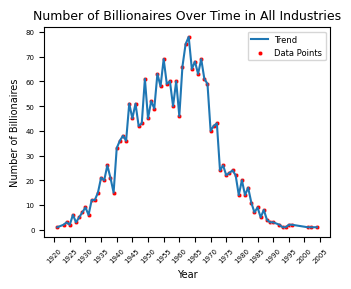

In [12]:
from matplotlib.ticker import MaxNLocator

year_slider = pn.widgets.RangeSlider(name='Year Range', start=1910, end=2006, value=(1920, 2005))

industries = df['industries'].unique().tolist()
industries.insert(0, 'All Industries')
industry_select = pn.widgets.Select(name='Select Industry', options=industries, value='All Industries')

@pn.depends(year_slider.param.value, industry_select.param.value)
def update_billionaires_over_time(year_range, selected_industry):
    filtered_df = df[(df['birthYear'] >= year_range[0]) & (df['birthYear'] <= year_range[1])]

    if selected_industry != 'All Industries':
        filtered_df = filtered_df[filtered_df['industries'] == selected_industry]

    year_counts = filtered_df['birthYear'].value_counts().sort_index()

    plt.figure(figsize=(3.5, 3))
    sns.lineplot(x=year_counts.index, y=year_counts.values, label='Trend')
    sns.scatterplot(x=year_counts.index, y=year_counts.values, color='red', s=10, label='Data Points')

    plt.title(f'Number of Billionaires Over Time in {selected_industry}', fontsize=9)
    plt.xlabel('Year', fontsize=7)
    plt.ylabel('Number of Billionaires', fontsize=7)

    plt.xticks(ticks=range(year_range[0], year_range[1] + 1, 5), rotation=45, fontsize=5)
    plt.yticks(fontsize=5)

    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.legend(fontsize=6)
    plt.tight_layout()

    return pn.pane.Matplotlib(plt.gcf())

billionaires_over_time_section = pn.Column(
    "### Number of Billionaires Over Time by Industry",
    year_slider,
    industry_select,
    update_billionaires_over_time
)

## 6. Economic Indicators and Wealth Levels of Billionaires
***Goal:*** *to assess how changes in consumer price index (CPI) and tax revenue correlate with the wealth levels of billionaires.*

In [13]:
from bokeh.models import HoverTool

year_slider = pn.widgets.RangeSlider(name='Year Range', start=1910, end=2023, value=(1920, 2023))
indicator_select = pn.widgets.Select(name='Select Economic Indicator', options=['CPI Change', 'Tax Revenue'])

@pn.depends(year_slider.param.value, indicator_select.param.value)
def update_scatter_plot(year_range, selected_indicator):
    filtered_df = df[(df['birthYear'] >= year_range[0]) & (df['birthYear'] <= year_range[1])]

    if selected_indicator == 'CPI Change':
        scatter_plot = filtered_df.hvplot.scatter(
            x='cpi_change_country', y='finalWorth', title='Net Worth vs CPI Change',
            height=450, width=500, xlabel='CPI Change (%)', ylabel='Net Worth (in billions)',
            color='green', size=10
        )
    elif selected_indicator == 'Tax Revenue':
        scatter_plot = filtered_df.hvplot.scatter(
            x='tax_revenue_country_country', y='finalWorth', title='Net Worth vs Tax Revenue',
            height=450, width=500, xlabel='Tax Revenue (in billions)', ylabel='Net Worth (in billions)',
            color='purple', size=10
        )

    return scatter_plot.opts(
        toolbar='above'
    )

economic_indicators = pn.Column(
    "### Analyze the Correlation Between Economic Indicators and Billionaire Wealth",
    year_slider,
    indicator_select,
    update_scatter_plot
)


In [ ]:
template = pn.template.MaterialTemplate(
    title='Billionaires Data Analysis Dashboard',
    favicon='./money.ico'
)

sidebar_header = pn.pane.HTML(
    """
    <h2 style="font-size:20px; color:#1a73e8; font-weight:bold; text-align:center; margin-bottom:15px;">
        Billionaires Dashboard
    </h2>
    """,
    sizing_mode='stretch_width'
)

image = pn.pane.Image('./money-8325180_1280.png', width=300, height=300)

paragraph = pn.pane.HTML(
    """
    <p style="font-size:12px; color:#333; margin-top:10px; text-align:center;">
        Welcome to the Billionaire Wealth Dashboard! This interactive tool provides an in-depth analysis of billionaire wealth distribution across various industries and demographics. Users can explore key insights such as the average wealth by category, the number of billionaires by country, and the age distribution of billionaires. The dashboard features dynamic visualizations, including histograms and bar charts, allowing users to filter data based on specific criteria like age ranges and industry categories.
    </p>
    """,
    sizing_mode='stretch_width'
)

template.sidebar.append(sidebar_header)
template.sidebar.append(image)
template.sidebar.append(paragraph)

template.main.append(
    pn.Row(
        pn.Card(wealth_distribution_section, sizing_mode='stretch_both'),
        pn.Card(average_wealth, sizing_mode='stretch_both'),
    )
)
template.main.append(
    pn.Row(
        pn.Card(country_section, sizing_mode='stretch_both', height=850, margin=(0,0,5,0)),
    )
)
template.main.append(
    pn.Row(
        pn.Card(young_billionaires_section, sizing_mode='stretch_both'),
        pn.Card(age_wealth_section, sizing_mode='stretch_both'),
    )
)
template.main.append(
    pn.Row(
        pn.Card(billionaires_over_time_section, sizing_mode='stretch_both'),
        pn.Card(economic_indicators, sizing_mode='stretch_both'),
    )
)

template.show()

Launching server at http://localhost:52732
